# Load the RDF data dump

In [4]:
%%time

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from rdflib import ConjunctiveGraph

ns = {"nb": "http://bise-eu.info/core-ontology#",
      "dc": "http://dcterms/",
      "p-plan": "http://purl.org/net/p-plan#",
      "edam": "http://purl.obolibrary.org/obo/edam#"}

g = ConjunctiveGraph()

### latest version of the RDF dataset dump
g.parse("https://raw.githubusercontent.com/bio-tools/content/master/datasets/bise-ontology-biii-dump.ttl", format="turtle")
g.parse("bise-linked-data-webapp/static/data/EDAM-bioimaging_alpha03.owl")
print(str(len(g)) + ' triples in Biii data graph')

27864 triples in Biii data graph
CPU times: user 1.56 s, sys: 361 ms, total: 1.93 s
Wall time: 2.61 s


# Level-0 entries

1362


<AxesSubplot:xlabel='created'>

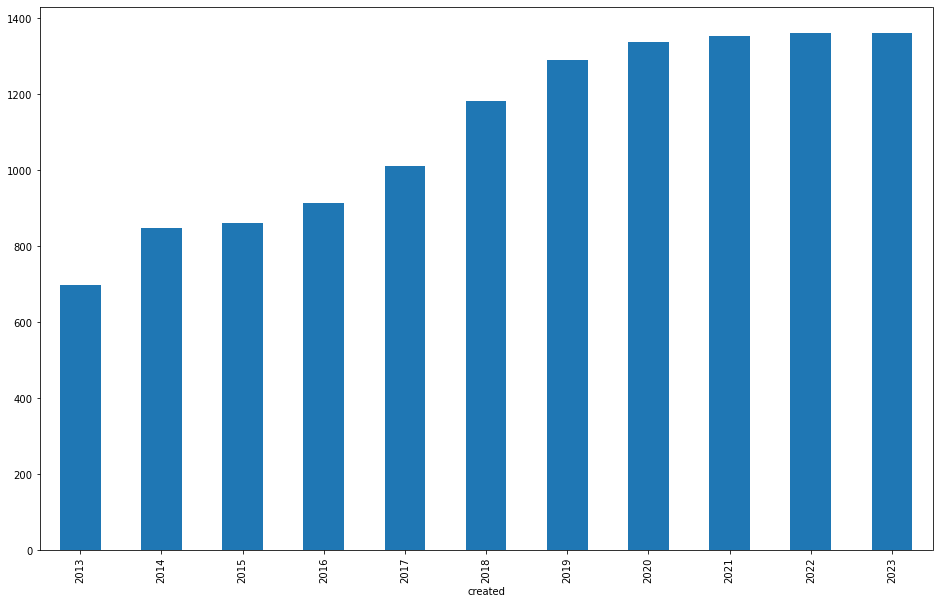

In [7]:
%matplotlib inline

plt.figure(figsize=(16, 10))

soft_dates = []
date_query = """
SELECT ?soft ?date WHERE {
    ?soft a <http://biii.eu/software> .
    ?soft dc:created ?date .
}
"""
results = g.query(date_query, initNs=ns)
for r in results:
    soft_dates.append({'soft':str(r['soft']), 'created':str(r['date'])})

print(len(soft_dates))

df = pd.DataFrame(soft_dates)
df["created"] = df["created"].astype("datetime64")

#df2 = df.groupby([df["created"].dt.year, df["created"].dt.month]).count()
df2 = df.groupby([df["created"].dt.year]).count()

df2['soft'].cumsum().plot(kind='bar')
#df2['soft'].cumsum()

# Sparse entries

940


<AxesSubplot:xlabel='created'>

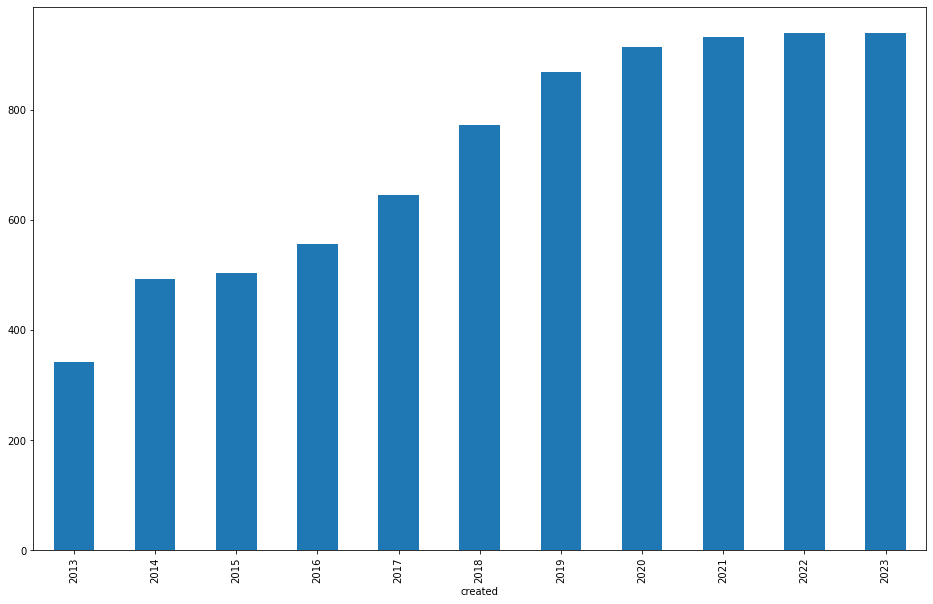

In [8]:
#%%time
%matplotlib inline

plt.figure(figsize=(16, 10))
#plt.figure(figsize=(9, 6))

soft_dates = []
date_query = """
SELECT DISTINCT ?soft ?date WHERE {
    ?soft a <http://biii.eu/software> .
    ?soft dc:created ?date .
    ?soft dc:title ?title .
    ?soft rdfs:comment ?description .
    FILTER (
        NOT EXISTS {?soft nb:hasImplementation ?i} 
        || NOT EXISTS {?soft nb:hasLocation ?loc} 
        || NOT EXISTS {?soft nb:hasIllustration ?ill} 
        || NOT EXISTS {?soft nb:hasAuthor ?auth}
        || NOT EXISTS {?soft nb:hasFunction ?func}
        || NOT EXISTS {?soft nb:openess ?lic_op}
        || NOT EXISTS {?soft nb:hasLicense ?lic}
        || NOT EXISTS {?soft nb:hasSupportedImageDimension ?dim}
        || NOT EXISTS {?soft nb:requires ?dep}
        || NOT EXISTS {?soft nb:hasProgrammingLanguage ?prog}
        || NOT EXISTS {?soft nb:hasPlatform ?plat}
        || NOT EXISTS {?soft nb:hasTopic ?topic}
        || NOT EXISTS {?soft nb:hasReferencePublication ?ref}
        || NOT EXISTS {?soft nb:hasDocumentation ?doc}
        || NOT EXISTS {?soft nb:hasComparison ?comp}
        || NOT EXISTS {?soft nb:hasDOI ?doi}
        || NOT EXISTS {?soft nb:hasUsageExample ?usag}
        || NOT EXISTS {?soft nb:hasTrainingMaterial ?train}
    )
}
"""
results = g.query(date_query, initNs=ns)
for r in results:
    soft_dates.append({'soft':str(r['soft']), 'created':str(r['date'])})

print(len(soft_dates))
df = pd.DataFrame(soft_dates)
df["created"] = df["created"].astype("datetime64")

#df2 = df.groupby([df["created"].dt.year, df["created"].dt.month]).count()
df2 = df.groupby([df["created"].dt.year]).count()
#df2

df2['soft'].cumsum().plot(kind='bar')
#df2['soft'].cumsum()

# Detailed entries

81


,soft,created
0,http://biii.eu/2d-brain-slice-region-annotatio...,2018-01-28 11:37:30
1,http://biii.eu/3-d-density-kernel-estimation,2018-10-18 10:18:22
2,http://biii.eu/3d-nuclei-clustering-tool,2020-09-22 15:59:35
3,http://biii.eu/allen-cell-structure-segmenter,2019-01-02 09:09:35
4,http://biii.eu/anisotropic-diffusion-2d,2013-10-11 13:08:41
...,...,...
76,http://biii.eu/webknossos-3d-image-annotation-...,2021-02-25 15:00:29
77,http://biii.eu/wis-phagotracker,2013-10-11 15:17:13
78,http://biii.eu/yeastspotter,2019-03-22 17:07:48
79,http://biii.eu/z-spacing-correction-fiji,2018-01-30 16:04:02


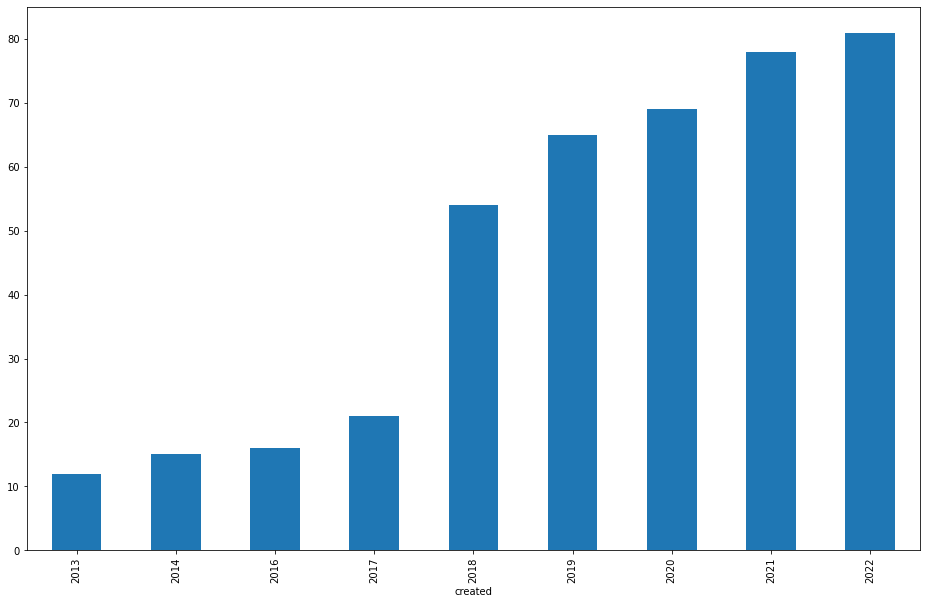

In [9]:
%matplotlib inline

plt.figure(figsize=(16, 10))
#plt.figure(figsize=(9, 6))

soft_dates = []
date_query = """
SELECT DISTINCT ?soft ?date WHERE {
    ?soft a <http://biii.eu/software> .
    ?soft dc:created ?date .
    ?soft dc:title ?title .
    ?soft rdfs:comment ?description .
    ?soft nb:hasImplementation ?i .
    ?soft nb:hasLocation ?loc .
    ?soft nb:hasIllustration ?ill .
    ?soft nb:hasAuthor ?auth .
    ?soft nb:hasFunction ?func .
    ?soft nb:openess ?lic_op .
    ?soft nb:hasLicense ?lic .
    
    ?soft nb:hasSupportedImageDimension|nb:requires ?usage .
    
    ?soft nb:hasProgrammingLanguage ?prog .
    ?soft nb:hasPlatform ?plat .
    ?soft nb:hasTopic ?topic .

}
"""
results = g.query(date_query, initNs=ns)
for r in results:
    soft_dates.append({'soft':str(r['soft']), 'created':str(r['date'])})

print(len(soft_dates))

df = pd.DataFrame(soft_dates)
df["created"] = df["created"].astype("datetime64")

#df2 = df.groupby([df["created"].dt.year, df["created"].dt.month]).count()
df2 = df.groupby([df["created"].dt.year]).count()

df2['soft'].cumsum().plot(kind='bar')
#df2['soft'].cumsum()

df

# Comprehensive entries

3


,soft,created
0,http://biii.eu/local-z-projector,2021-05-05 14:00:00
1,http://biii.eu/niftynet,2018-03-20 16:53:11
2,http://biii.eu/squirrel,2018-12-09 17:41:11


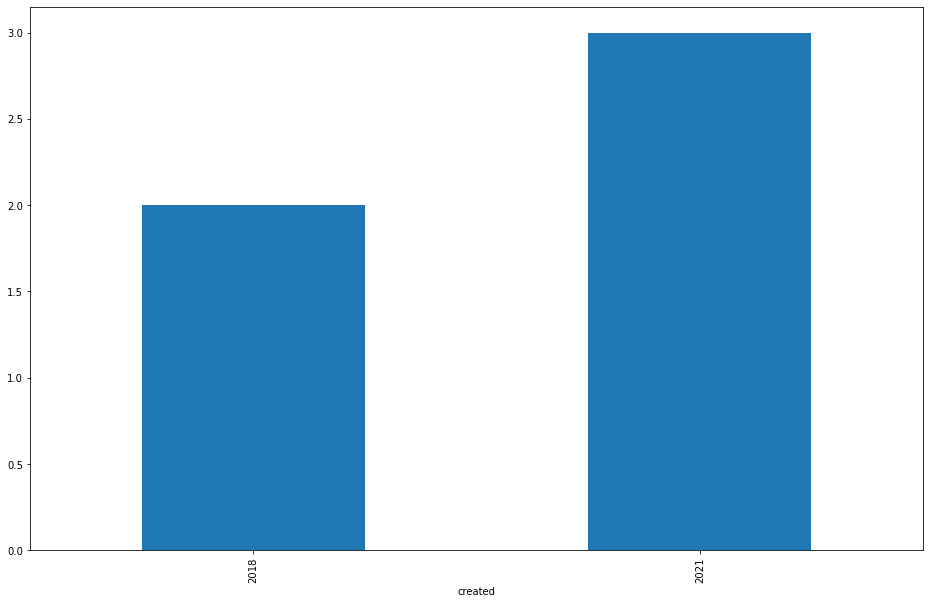

In [11]:
%matplotlib inline

plt.figure(figsize=(16, 10))
#plt.figure(figsize=(9, 6))

soft_dates = []
date_query = """
SELECT DISTINCT ?soft ?date WHERE {
    ?soft a <http://biii.eu/software> .
    ?soft dc:created ?date .
    ?soft dc:title ?title .
    ?soft rdfs:comment ?description .
    ?soft nb:hasImplementation ?i .
    ?soft nb:hasLocation ?loc .
    ?soft nb:hasIllustration ?ill .
    ?soft nb:hasAuthor ?auth .
    ?soft nb:hasFunction ?func .
    ?soft nb:openess ?lic_op .
    ?soft nb:hasLicense ?lic .
    
    ?soft nb:hasSupportedImageDimension|nb:requires ?usage .
    
    ?soft nb:hasProgrammingLanguage ?prog .
    ?soft nb:hasPlatform ?plat .
    ?soft nb:hasTopic ?topic .
    
    ?soft nb:hasReferencePublication|nb:hasDocumentation|nb:hasComparison ?ref .
    ?soft nb:hasDOI ?doi .
    ?soft nb:hasUsageExample|nb:hasTrainingMaterial ?train
    
}
"""
results = g.query(date_query, initNs=ns)
for r in results:
    soft_dates.append({'soft':str(r['soft']), 'created':str(r['date'])})

print(len(soft_dates))

df = pd.DataFrame(soft_dates)
df["created"] = df["created"].astype("datetime64")

#df2 = df.groupby([df["created"].dt.year, df["created"].dt.month]).count()
df2 = df.groupby([df["created"].dt.year]).count()

df2['soft'].cumsum().plot(kind='bar')
#df2['soft'].cumsum()

df